### Import necessary Python libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Create the data frame

In [48]:
df=pd.read_csv("Zomato data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Let’s convert the data type of the “rate” column to float and remove the denominator

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
def convert_rate (rate):
    if '/' in rate:
        n,_ = rate.split('/')
        return float(n)
    return float(rate)

df['rate'] = df['rate'].apply(convert_rate)


In [47]:
print(df)

                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

### To obtain a summary of the data frame, you can use the following code

In [ ]:
df.info()

### Check if the dataset have any null values.

In [24]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

### Listed_in column graphical represnetation.

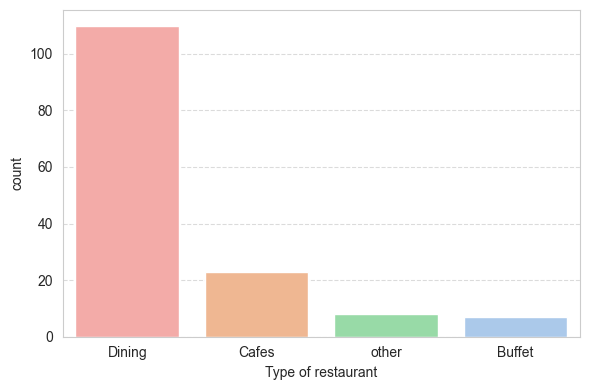

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))

sns.countplot(x=df['listed_in(type)'], hue="listed_in(type)",data=df, palette="pastel",order=df['listed_in(type)'].value_counts().index )
plt.xlabel("Type of restaurant")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Conclusion: The majority of the restaurants fall into the dining category


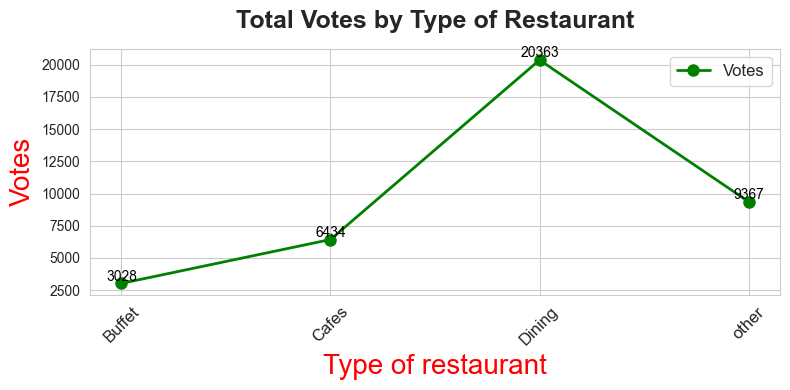

In [52]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

plt.figure(figsize=(8, 4))

plt.plot(result.index, result['votes'], color="green", marker="o", linewidth=2, markersize=8, label="Votes")
plt.title("Total Votes by Type of Restaurant", fontsize=18, pad=15, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.legend(loc="upper right", fontsize=12)

plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

for x, y in zip(result.index, result['votes']):
    plt.text(x, y + 200, f"{int(y)}", ha='center', fontsize=10, color="black")

plt.tight_layout()
plt.show()

### Conclusion: Dining restaurants are preferred by a larger number of individuals

### Determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [53]:
max_votes = df['votes'].max()
max_votes_restaurant = df.loc[df['votes'] == max_votes,'name']

print("Restaurant(s) with the maximum votes:")
for name in max_votes_restaurant:
    print(f"- {name} (Votes: {max_votes})")

Restaurant(s) with the maximum votes:
- Empire Restaurant (Votes: 4884)


### Determine the top 3 Restaurants based on no of online booking and also table booking.

In [55]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet


In [76]:

top_order_online = df.sort_values(by='online_order', ascending=False).head(3)
top_table_book= df.sort_values(by='book_table', ascending=False).head(3)

print("Top 3 resturants based on Online booking are:")
for index, row in top_order_online.iterrows():
    print(f"- {row['name']} (Online Bookings: {row['online_order']})")

print("\nTop 3 Restaurants based on Table Bookings:")
for index, row in top_table_book.iterrows():
    print(f"- {row['name']} (Table Bookings: {row['book_table']})")

Top 3 resturants based on Online booking are:
- Jalsa (Online Bookings: Yes)
- Kitchen Garden (Online Bookings: Yes)
- FreshMenu (Online Bookings: Yes)

Top 3 Restaurants based on Table Bookings:
- Jalsa (Table Bookings: Yes)
- Onesta (Table Bookings: Yes)
- Goa 0 Km (Table Bookings: Yes)


In [77]:
online_booking_count = df[df['online_order'] == 'Yes'].groupby('name').size().reset_index(name='online_booking_count')

table_booking_count = df[df['book_table'] == 'Yes'].groupby('name').size().reset_index(name='table_booking_count')

top_online_booking = online_booking_count.sort_values(by='online_booking_count', ascending=False).head(3)
top_table_booking = table_booking_count.sort_values(by='table_booking_count', ascending=False).head(3)

# Print the results
print("Top 3 Restaurants based on Online Bookings:")
for _, row in top_online_booking.iterrows():
    print(f"- {row['name']} (Online Bookings: {row['online_booking_count']})")

print("\nTop 3 Restaurants based on Table Bookings:")
for _, row in top_table_booking.iterrows():
    print(f"- {row['name']} (Table Bookings: {row['table_booking_count']})")

Top 3 Restaurants based on Online Bookings:
- Onesta (Online Bookings: 2)
- San Churro Cafe (Online Bookings: 2)
- 360 Atoms Restaurant And Cafe (Online Bookings: 1)

Top 3 Restaurants based on Table Bookings:
- Onesta (Table Bookings: 2)
- Goa 0 Km (Table Bookings: 1)
- Cafe Shuffle (Table Bookings: 1)


### Categorize the Restaurant based on approx-cost of 2 people less than 500 based on listed-in column. and find the top 5 Restaurants.

In [78]:
# Filter restaurants with approx cost for two people less than 500
filtered_data = df[df['approx_cost(for two people)'] < 500]

# Group by 'listed_in' column and count the number of restaurants in each category
category_counts = filtered_data.groupby('listed_in(type)').size().reset_index(name='count')

# Sort categories by count and take the top 5
top_categories = category_counts.sort_values(by='count', ascending=False).head(5)

# Print the results
print("Top 5 Categories based on Approx Cost < 500:")
for _, row in top_categories.iterrows():
    print(f"- {row['listed_in(type)']} (Count: {row['count']})")

# Optionally, find the top restaurants within each of these categories
print("\nTop Restaurants in Each of These Categories:")
for category in top_categories['listed_in(type)']:
    # Filter data for the current category
    category_data = filtered_data[filtered_data['listed_in(type)'] == category]
    # Sort by rating or votes to find the top 5 restaurants
    top_restaurants = category_data.sort_values(by='rate', ascending=False).head(5)
    print(f"\nCategory: {category}")
    for _, row in top_restaurants.iterrows():
        print(f"- {row['name']} (Cost: {row['approx_cost(for two people)']}, Rating: {row['rate']})")


Top 5 Categories based on Approx Cost < 500:
- Dining (Count: 84)
- Cafes (Count: 6)
- Buffet (Count: 1)

Top Restaurants in Each of These Categories:

Category: Dining
- Corner House Ice Cream (Cost: 400, Rating: 4.3/5)
- Frozen Bottle (Cost: 400, Rating: 4.2/5)
- Sri Guru Kottureshwara Davangere Benne Dosa (Cost: 150, Rating: 4.1/5)
- Spicy Tandoor (Cost: 150, Rating: 4.1/5)
- The Biryani Cafe (Cost: 300, Rating: 4.1/5)

Category: Cafes
- Caf-Eleven (Cost: 450, Rating: 4.0/5)
- T3H Cafe (Cost: 300, Rating: 3.9/5)
- Coffee Tindi (Cost: 200, Rating: 3.8/5)
- Hide Out Cafe (Cost: 300, Rating: 3.7/5)
- 360 Atoms Restaurant And Cafe (Cost: 400, Rating: 3.1/5)

Category: Buffet
- Addhuri Udupi Bhojana (Cost: 300, Rating: 3.7/5)


### Distribution of rating across restaurants

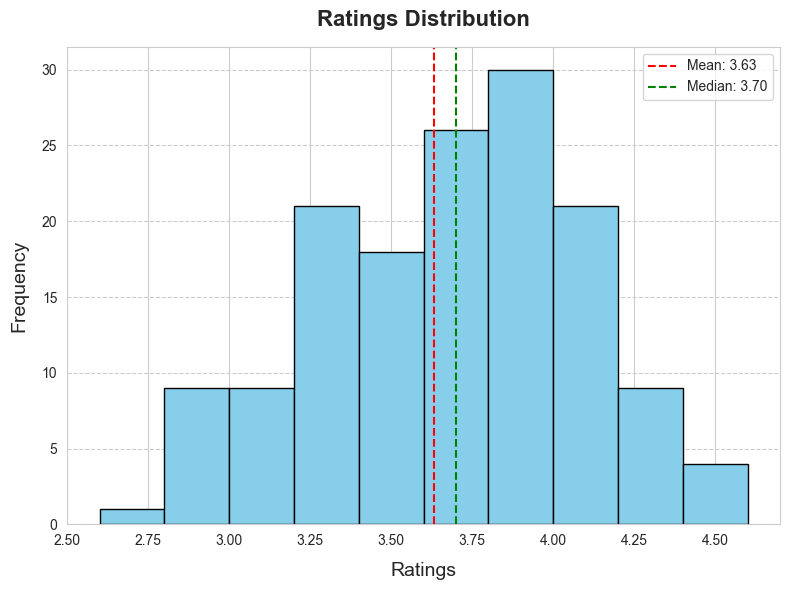

In [46]:
plt.figure(figsize=(8, 6))

plt.hist(df['rate'],bins=10,color='skyblue', edgecolor='black')

plt.title("Ratings Distribution", fontsize=16, weight='bold', pad=15)
plt.xlabel("Ratings", fontsize=14, labelpad=10)
plt.ylabel("Frequency", fontsize=14, labelpad=10)

plt.grid(axis='y', linestyle='--')

mean_value = df['rate'].mean()
median_value = df['rate'].median()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_value:.2f}')

plt.legend(fontsize=10)
plt.tight_layout()
plt.show()